# Explicación de concepto de optimizador

**Autor:** Jazna Meza Hidalgo

**Correo Electrónico:** ja.meza@profesor.duoc.cl

**Fecha de Creación:** Febrero de 2025
**Versión:** 1.0  

---

## Descripción

Los optimizadores juegan un papel clave en el entrenamiento de redes neuronales, ya que afectan la velocidad y la calidad de la convergencia.

Este notebook ofrece una explicación de los optimizadores más usados y ejemplos en Python utilizando TensorFlow/Keras

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- tensorflow (2.18.0)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import tensorflow as tf
print(tf.__version__)
````



In [9]:
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras

# Compilación de la red con distintos optimizadores

## Descenso de Gradiente Estocástico (SGD)

**Características**

+ Actualiza los pesos con cada muestra en lugar de usar todo el conjunto de datos.
+ Puede ser ruidoso pero ayuda a escapar de mínimos locales.
+ Usa una tasa de aprendizaje fija, aunque se puede combinar con momentum.

**Pros:**

+ Simple y eficiente para datasets grandes.

**Contras:**

+ Puede ser lento y necesita una tasa de aprendizaje bien ajustada.

**Código para compilar una red usando este optimizador**



```
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
```



## SGD con Momentum
**Características:**

+ Agrega un término de momentum para acelerar la convergencia.
+ Reduce las oscilaciones en la dirección del gradiente.

**Pros:**
+ Más rápido que el SGD puro y más estable.

**Contras:**
+ Puede necesitar ajuste fino de los hiperparámetros.

**Código para compilar la red:**


```
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
```



## RMSprop (Root Mean Square Propagation)
**Características:**

+ Ajusta la tasa de aprendizaje para cada parámetro de manera adaptativa.
+ Usa el promedio exponencial de los cuadrados de gradientes anteriores.

**Pros:**
+ Bueno para problemas con datos no estacionarios.

**Contras:**
+ Puede ser ineficiente en ciertos problemas de optimización.

Para compilar una red:

```
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
```




## Adam (Adaptive Moment Estimation)
**Características:**

+ Combina lo mejor de RMSprop y Momentum.
+ Usa momentos de primer y segundo orden para actualizar los pesos.

**Pros:**
+ Generalmente es el mejor optimizador para la mayoría de los casos.

**Contras:**
+ Puede no generalizar bien en algunos problemas específicos.

**Código para compilar la red**

```
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

```

## AdaGrad (Adaptive Gradient)
**Características:**

+ Ajusta la tasa de aprendizaje según el histórico de gradientes.
+ Tiende a hacer que los parámetros dejen de actualizarse en largas iteraciones.

**Pros:**
+ Bueno para datos dispersos.

**Contras:**
+ La tasa de aprendizaje decrece demasiado rápido.

**Código para compilar la red**

```
model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
```





## Adamax (Versión mejorada de Adam)
**Características:**

+ Similar a Adam pero con una normalización diferente.
+ Más robusto en ciertos casos con datos ruidosos.

**Pros:**
+ Funciona bien en problemas con datos de gran magnitud.

**Contras:**
+ Menos comúnmente usado que Adam.

**Código para compilar la red**


```
model.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.002),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

```



## Nadam (Adam + Nesterov Momentum)
**Características:**

+ Variante de Adam con la técnica de Nesterov Accelerated Gradient (NAG).
+ Tiende a converger más rápido que Adam en algunos casos.

**Pros:**

+ Más rápido en algunas arquitecturas.

**Contras:**
+ Puede ser menos estable en algunos problemas.

**Código para compilar la red**


```
model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.002),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

```



# Entrenamiento de la red

Una vez que se haya compilado la red se debe entrenar y eso se realiza usando la línea de código:

```
# Entrenar el modelo
model.fit(x_train, y_train, epochs=5)
```



# Funcionamiento completo

In [19]:
# Generar datos de ejemplo
np.random.seed(29)
X = np.random.rand(1000, 10)
y = np.random.randint(0, 2, size=(1000,))

In [21]:
X.shape

(1000, 10)

In [14]:
y

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,

                 SGD tomó 1.6546 segundos
      SGD + Momentum tomó 1.7973 segundos
             RMSprop tomó 2.0934 segundos
                Adam tomó 3.1173 segundos
             AdaGrad tomó 2.2855 segundos
              Adamax tomó 3.0435 segundos
               Nadam tomó 2.9201 segundos


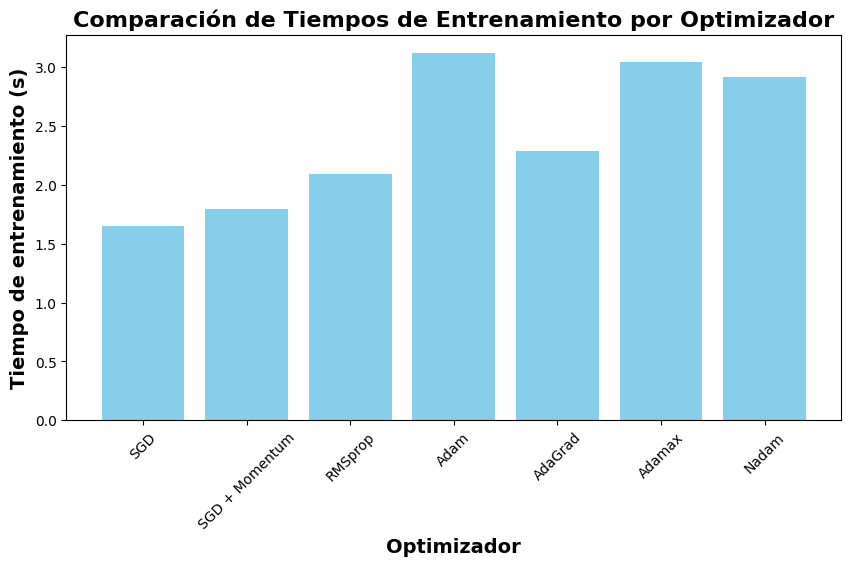

In [18]:
# Definir los optimizadores a evaluar
optimizers = {
    "SGD": tf.keras.optimizers.SGD(),
    "SGD + Momentum": tf.keras.optimizers.SGD(momentum=0.9),
    "RMSprop": tf.keras.optimizers.RMSprop(),
    "Adam": tf.keras.optimizers.Adam(),
    "AdaGrad": tf.keras.optimizers.Adagrad(),
    "Adamax": tf.keras.optimizers.Adamax(),
    "Nadam": tf.keras.optimizers.Nadam(),
}

# Almacenar tiempos de entrenamiento
training_times = {}

# Definir la arquitectura del modelo
def create_model(name_network = "Una_red"):
  red = keras.Sequential(name=name_network)
  red.add(keras.layers.Input(shape=(10,), name='entrada'))
  red.add(keras.layers.Dense(64, activation='relu', name='primera_capa'))
  red.add(keras.layers.Dense(32, activation='relu', name='segunda_capa'))
  red.add(keras.layers.Dense(1, activation='sigmoid', name='capa_de_salida'))
  return red

# Entrenar el modelo con cada optimizador
for opt_name, optimizer in optimizers.items():
  model = create_model()
  model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

  # Medir el tiempo de entrenamiento
  start_time = time.time()
  model.fit(X, y, epochs=10, batch_size=32, verbose=0)  # Entrenar por 10 épocas
  end_time = time.time()

  training_times[opt_name] = end_time - start_time
  print(f"{opt_name: >20} tomó {training_times[opt_name]:.4f} segundos")

# Graficar los tiempos de entrenamiento
plt.figure(figsize=(10, 5))
plt.bar(training_times.keys(), training_times.values(), color="skyblue")
plt.xlabel("Optimizador", fontsize=14, fontweight="bold")
plt.ylabel("Tiempo de entrenamiento (s)", fontsize=14, fontweight="bold")
plt.title("Comparación de Tiempos de Entrenamiento por Optimizador", fontsize=16, fontweight="bold")
plt.xticks(rotation=45)
plt.show()


# Tabla resumen

| Optimizador     | Adaptabilidad de la Tasa de Aprendizaje | Velocidad de Convergencia | Recomendado para                          |
|---------------|---------------------------------|----------------------|--------------------------------|
| **SGD**       | No                              | Lento                | Problemas convexos y entrenamiento en línea |
| **SGD + Momentum** | No                          | Más rápido           | Modelos profundos con optimización difícil |
| **RMSprop**   | Sí                              | Medio                | Series de tiempo y datos no estacionarios |
| **Adam**      | Sí                              | Rápido               | Casi todos los problemas de aprendizaje profundo |
| **AdaGrad**   | Sí                              | Medio                | Datos dispersos y NLP |
| **Adamax**    | Sí                              | Rápido               | Datos con valores grandes |
| **Nadam**     | Sí                              | Más rápido que Adam  | Modelos grandes con optimización difícil |
